# Week 2 Introduction to Machine Learning

**Objectives**

In this weeks colab we will introduce the Machine Learning library `scikit-learn` and practice some basic concepts of Machine Learning (ML), including:

1. A brief recap of what ML is
2. How to do classification with `scikit-learn`
3. How to evaluate model performance
4. How to do clustering with `scikit-learn`
5. How to do dimensionality reduction with `scikit-learn`

**Notes**

- If a line starts with the fountain pen symbol (🖌️), it asks you to implement a code part or answer a question.
- Lines starting with the light bulb symbol (💡) provide important information or tips and tricks.
- Lines starting with the checkmark symbol (✅) reveal the solutions to specific exercises.

## 1. Intro

### Setup

This notebook relies on helper functions defined in a separate Python file.
You can download it by running the following cell:

In [ ]:
!wget https://github.com/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/raw/refs/heads/main/IntroductionToML/utils.py

You don't need to worry about what is inside the file to follow this tutorial, though you are welcome to take a peek if you're curious!

### Recap

**What is Machine Learning?**

In ecology, we often deal with complex systems where it's hard to write manual rules for every scenario.
**Machine Learning (ML)** solves this by letting the computer discover patterns in data (Experience) to improve its accuracy (Performance) on a specific goal (Task).

Or formally:

> A computer program is said to learn from *experience (E)* with respect to some classes of *tasks (T)* and *performance measure (P)* if its performance can improve with E on T measured by P.
>
> M. T. Mitchell. 1997. Machine Learning

**Example**

Identifying species in the field is time-consuming and requires expert knowledge.
Machine Learning can help automate this process, allowing researchers to scale up studies.
Imagine you are building a tool to identify British butterflies from field photos:

- **Task (T)**: Classifying a new photo into the correct butterfly species.
- **Performance (P)**: The percentage of images correctly identified by the model.
- **Experience (E)**: A large database of labeled butterfly images (e.g., from museum collections or iNaturalist).

**How does a computer program learn?**

There are many ways to learn from data, and we call each specific approach a **model**.
Commonly models are **parameterised**, meaning they have internal "dials" (called **parameters**) that control their behavior.
During a process called **fitting**, the computer uses an algorithm to automatically tune these dials so the model's output matches the training data as closely as possible.
Once the parameters are optimised, the model is ready to make predictions on new data.

### Scikit-Learn

The go-to tool for general machine learning in Python is **Scikit-Learn** (`sklearn`).

![scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png?20180808062052)

It provides an extensive library of ready-to-use algorithms and tools for building machine learning pipelines.
It aslso uses a consistent "template" for every model, which makes it easy to experiment with different approaches once you learn the basics.
You can learn more about `scikit-learn` in its official [documentation](https://scikit-learn.org/stable/index.html).

In [1]:
import sklearn  # notice scikit-learn is imported as sklearn.

# scikit-learn will be preinstalled in colab environments

# print the currently installed scikit-learn version
print(sklearn.__version__)

1.6.1


## 2. Classification

### Case study: species identification of flowers

Now let's work with a toy example to see machine learning in action.
Suppose you need to automate the identification of Iris flower species for a large-scale study.
You collect flowers from the field and bring them to the lab, where a device scans each flower and measures several properties.

How would **you** describe this Iris flower?

<img alt="Iris versicolor" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="600" />

* Colour?
* Number of stripes?
* Size?
* Weight?
* Environment?

In machine learning, these descriptors are called features.

**What are features?**

They are numerical or categorical descriptors, attributes or traits of the object of study.

> A **feature** is an individual measurable property or characteristic of a phenomenon
>
> *Bishop, Christopher (2006).
  Pattern recognition and machine learning*

For Iris flowers, many features could be used, but for now let's assume that our scanning device only measures the length and width of the sepals and petals.

![iris sepal/petal length/width](https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg)

**Where to get Iris flower data?**

A dataset of iris measurements is publicly available.
Find a description [here](https://archive.ics.uci.edu/ml/datasets/iris).

Lets load a dataset of Iris flower measurements using `scikit-learn`.

In [2]:
# scikit-learn offers toy datasets including the iris dataset.
# load the dataset module from scikit-learn.
from sklearn import datasets

In [3]:
# load the iris dataset
iris = datasets.load_iris(as_frame=True)

# extract the features table
iris_data = iris.data

In [4]:
# print the first rows
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Dataset summary**

We now have two of the three ingredients for our machine learning task:

1. **Task (T)**: Identify the species of the Iris flower from the measurements taken by the scanner.
2. **Experience (E)**: A dataset containing measurements of flowers from three different species.

We will cover performance evaluation in the next section.
Before that, let's explore what a classification task actually is and look at a couple of models commonly used to solve them.

### What is a classification task?

In **supervised learning**, we aim to predict a **target** variable using a set of input **features**.
When that target variable is categorical (representing discrete groups or labels), the task is called **classification**.

For the Iris dataset, the question is: given our feature vector **x** (the measurements), can we predict the correct species (the class label) **y**?

**Inspect the targets**

Let's examine the **targets** of the Iris dataset.
These represent the specific species ID assigned to each individual flower.

In [5]:
# extract the classification targets
iris_target = iris.target

# print first values of iris_target
iris_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Notice that the target classes are encoded as integers.
For readability, we will map these values to their corresponding species names.

In [6]:
# get the class names
species_names = iris.target_names

# map the target integer values to species names
y_iris = iris_target.apply(lambda index: species_names[index])

y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

Finally, let's count how many flowers of each species we have.

In [7]:
# count the number of rows per target class
iris_target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

**Visualsing the dataset**

To simplify visualisation, we will start by selecting just two flower features: petal length and petal width.

In [8]:
feature_1 = "petal length (cm)"
feature_2 = "petal width (cm)"

# This will extract a dataframe with only the two selected columns
X_iris = iris_data[[feature_1, feature_2]]

Each datapoint has some features and a class label (the species).

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

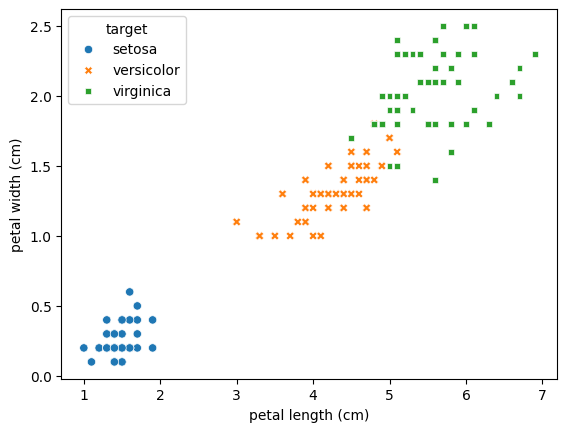

In [9]:
import seaborn as sns

sns.scatterplot(
    iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

The fundamental challenge of classification is: Given a **new datapoint** with unknown identity, how can we determine its correct class?

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

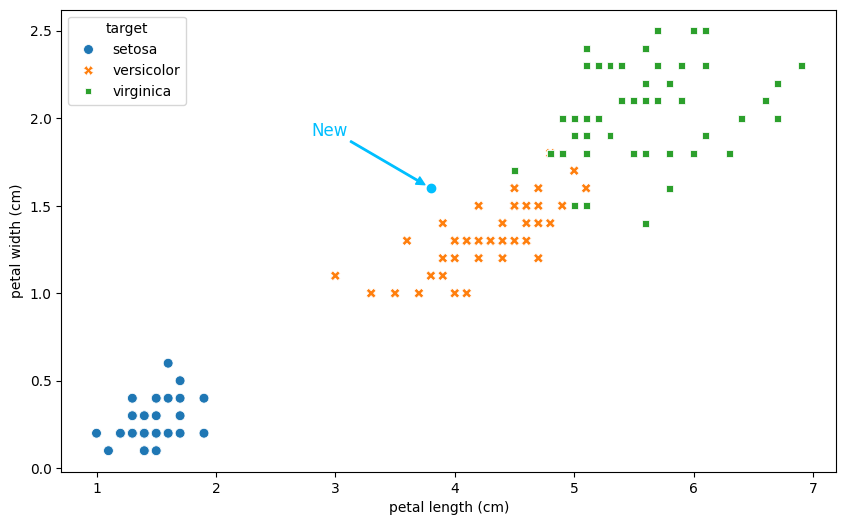

In [10]:
from utils import scatter_plot_with_test_point

# create new test point (change if you like)
test_point = [3.8, 1.6]  # petal length cm, petal width cm

scatter_plot_with_test_point(
    iris_data,
    feature_1=feature_1,
    feature_2=feature_2,
    target=y_iris,
    test_point=test_point,
)

### Classification models

In this section, we will briefly explore three types of models that use very different strategies for learning.

**Nearest neighbour**

The idea behind the **Nearest Neighbor** model is straightforward: for any new test point, we search for the observation in our dataset that is **most similar** to it and assume they share the same class.
Here, similarity is determined by the features, specifically by calculating the distance between feature vectors.

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

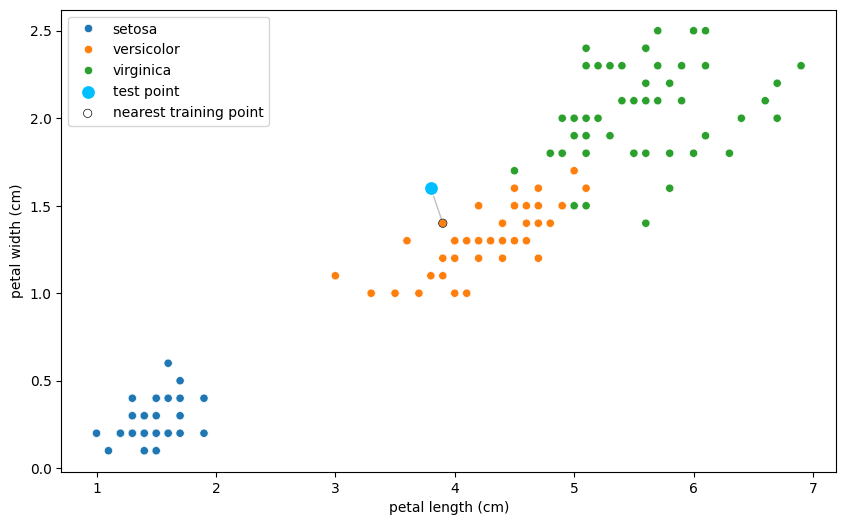

In [11]:
from utils import scatter_plot_with_closest_point_to_test_point

scatter_plot_with_closest_point_to_test_point(
    iris_data,
    feature_1=feature_1,
    feature_2=feature_2,
    target=y_iris,
    test_point=test_point,
)

Implementing these models is quite easy using scikit-learn.

In [12]:
# import the KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

# create a model instance
knn_model_1 = KNeighborsClassifier(n_neighbors=1)

# fit model with the iris dataset
knn_model_1.fit(X_iris, y_iris)

KNeighborsClassifier(n_neighbors=1)

A great way to visualise what the model is learning is to plot the decision regions and boundary.
These indicate all how the model splits the **feature space** into regions of the same class.
Any new point is classified depending on which region it falls.

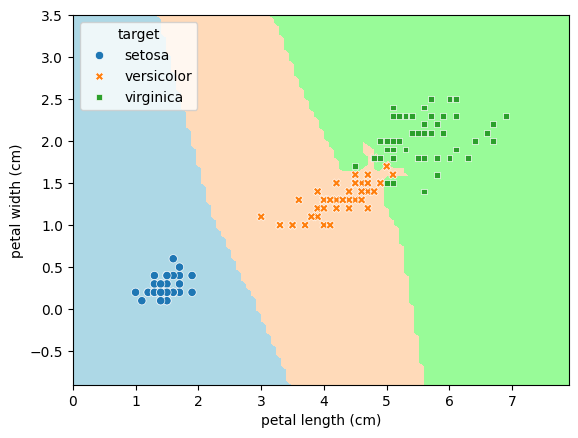

In [13]:
from utils import plot_decision_boundary
import seaborn as sns
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["lightblue", "peachpuff", "palegreen"])

# plot the decision regions
ax = plot_decision_boundary(knn_model_1, X_iris, cmap=cmap_light)

# overlay data points from iris dataset
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

You can modify the behavior of the model in several ways; these settings are known as **hyperparameters**.
For instance, rather than relying on just a single neighbor, you can consider the `k`-nearest neighbors and assign the most common class among them as the predicted label.

Too see all available hyperparameters, you can check the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

#### 🖌️*Exploring hyper-parameters*

Train a NearestNeighbor classifier using `k=5` and plot the decision boundaries.
What qualitative changes do you observe in the decision boundary plot?

✅ See solution below

In [ ]:
# create a model instance
knn_model_5 = KNeighborsClassifier(n_neighbors=5)

# fit model with the iris dataset
knn_model_5.fit(X_iris, y_iris)

# plot the decision regions
ax = plot_decision_boundary(knn_model_5, X_iris, cmap=cmap_light)

# overlay data points from iris dataset
sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
    ax=ax,
)

ax.set_title("5-NearestNeighbor")

The main qualitative differences are:

1. The decision boundary is smoother, with fewer sharp or irregular regions.
   This reflects reduced sensitivity to individual data points.
2. Unlike the 1-nearest neighbor model, some points near class boundaries are misclassified, since predictions are now based on the majority of the 5 nearest neighbors rather than a single point.

**Logistic Regression**

Despite its name, Logistic Regression is a model used for classification, not regression.

It is a linear model because it makes predictions based on a weighted sum of the input features.
For every possible class (e.g., each flower species), the model learns a specific set of weights ($w$).
It calculates a "score" for each class by multiplying each feature by its corresponding weight:

$$ score_i = w_{i, 1} \cdot \text{feat}_1 + ...
+ w_{i, k} \cdot \text{feat}_k $$

The class that achieves the highest weighted sum is the one the model selects as its prediction.
Training the model means finding the optimal values for these weights ($w$) so that the highest scores align with the correct labels in our dataset.

Here's how you train one with `scikit-learn`

In [14]:
from sklearn.linear_model import LogisticRegression

# Create a model instance. You could also provide
# some hyperparameters here, but by not providing
# any we are using the default
lr_model = LogisticRegression()

# Fit the model to the dataset
lr_model.fit(X_iris, y_iris)

LogisticRegression()

Because these scores are calculated using a linear equation, the "boundaries" where the model switches from predicting one class to another will appear as straight lines when visualised.

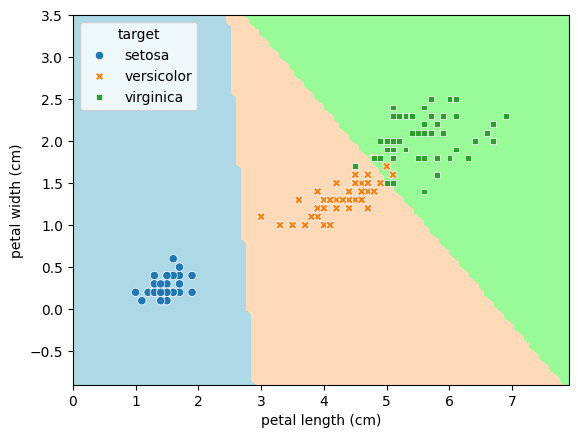

In [16]:
# plot the decision regions
ax = plot_decision_boundary(lr_model, X_iris, cmap=cmap_light)

# overlay data points from iris dataset
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

**Decision Trees and Random Forest**

Decision Trees use a series of binary choices to discriminate between data points.
By following a sequence of logical splits, the model "bins" a test point into its predicted species.

Example binary decisions include checking if **petal length ≤ 5.1 cm** or if **petal width ≤ 1.75 cm**.
These rules can be nested to create specific classifications, such as: *"If petal length > 5.2 cm AND petal width < 1.3 cm, then predict Setosa."*

Each individual decision splits the feature space into two distinct regions.

Text(5.5, 1.1, 'width < 1.75\n& length >= 4.95')

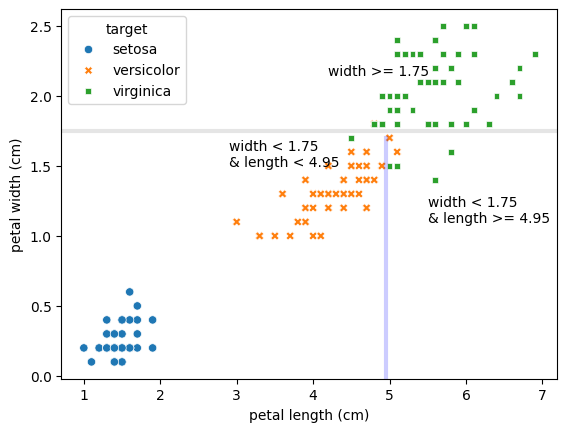

In [19]:
# plot the dataset points
ax = sns.scatterplot(
    data=X_iris,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

# draw horizontal line at y = 1.75
ax.axhline(1.75, color="gray", linewidth=3, alpha=0.2)

# draw vertical line at x = 4.95
ax.axvline(4.95, color="blue", linewidth=3, alpha=0.2, ymax=0.65)

# add text to label regions
ax.text(4.2, 2.15, f"width >= 1.75")
ax.text(2.9, 1.5, f"width < 1.75\n& length < 4.95")
ax.text(5.5, 1.1, f"width < 1.75\n& length >= 4.95")

Implementing a decision tree with scikit-learn is straightforward.

In [20]:
# import the Decision Tree Classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# create a Decision Tree classifier model
decision_tree = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01)
# check the scikit-learn documentation to see possible configurations

# fit to dataset
decision_tree.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01)

One of the primary advantages of Decision Trees is that they are highly interpretable, allowing us to follow the exact logic behind any specific prediction.
We can visualise the entire hierarchy of these decisions.

Text(0.73, 0.66, 'no')

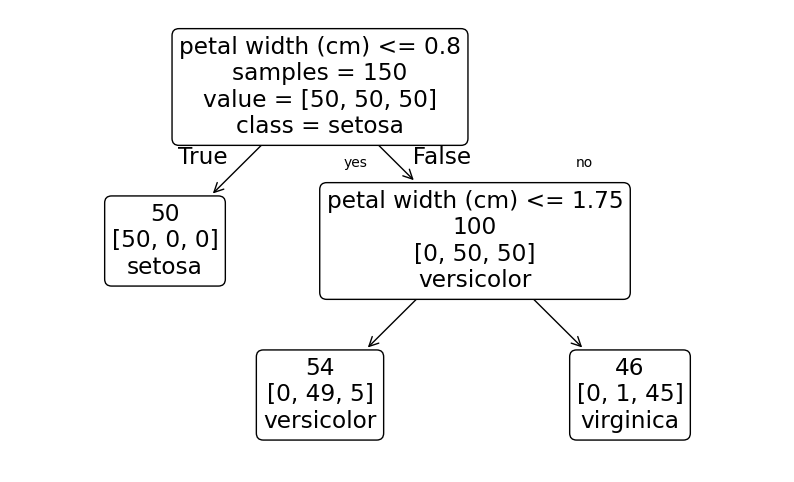

In [22]:
# import plot_tree function from tree tools in scikit-learn
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# create a new figure
_, ax = plt.subplots(figsize=(10, 6))

# visualize the trained decision trees
plot_tree(
    decision_tree,
    feature_names=[feature_1, feature_2],
    class_names=decision_tree.classes_,
    impurity=False,
    label="root",
    rounded=True,
    ax=ax,
)

# Add labels to decisions
ax.text(0.43, 0.66, "yes")
ax.text(0.73, 0.66, "no")

A **Random Forest** buils on this concept by using a large collection of decision trees.
Each tree is trained on a random subset of the data and features.
To reach a final classification, the forest takes a "vote" among all its trees, using the majority result as the final prediction.

#### 🖌️*Train a random forest model*

Search in the scikit-learn documentation for `RandomForestClassifier`.
Train a random forest models with different number of trees (`n_estimators=1, 10, 100`) and plot their decision boundary.
What do you observe?

✅ Solution below.

*Notes*:

- The scikit-learn documentation of RandomForestClassifier is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
  To find it you could search for `scikit random forest classifier` in the browser or a similar query.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [1, 10, 100]

plt.figure(figsize=(15, 5))

for index, num in enumerate(n_estimators, start=1):
    ax = plt.subplot(1, 3, index)

    # Create a random forest instance
    rf_model = RandomForestClassifier(n_estimators=num)

    # Train the random forest
    rf_model.fit(X_iris, y_iris)

    # plot the decision regions
    plot_decision_boundary(rf_model, X_iris, cmap=cmap_light, ax=ax)

    # overlay data points from iris dataset
    sns.scatterplot(
        data=iris_data,
        x=feature_1,
        y=feature_2,
        hue=y_iris,
        style=y_iris,
        ax=ax,
    )

    ax.set_title(f"n_estimators = {num}")

Some observations:

1. The decision boundaries at the edges of the feature space are block-like, with mostly vertical and horizontal splits.
2. Within the dataset (between the data points), there are no visible differences across the models.
3. When rerunning the models, the boundaries change noticeably, especially near the edges.

*Note:*

This dataset is relatively simple, making it difficult to observe the typical effects of increasing the number of trees in a random forest.
In more complex settings, adding more estimators usually leads to smoother and more stable decision boundaries, since predictions are averaged across many models.

### How to choose a model?

The most reliable way to select a model is to test multiple options and evaluate their performance (which we will cover in the next section).
However, because it is impossible to test every available algorithm, we use specific criteria to narrow down an initial list of candidates.

Here we will discuss a few:

1. Model flexibility or capacity
2. Speed and computational demands
3. Probabilistic vs categorical outputs.

**Model capacity**

Model capacity describes an algorithm's ability to fit complex patterns.
It essentially determines how intricate the decision regions can be.

For instance, a **Logistic Regression** model is limited to linear patterns, resulting in relatively low capacity.
In contrast, a Nearest Neighbor model (`k=1`) has very high capacity; it can practically adapt to fit any pattern present in a dataset.

While high-capacity models can capture complex relationships, they are prone to **overfitting**.
They often memorize noise in the training data rather than the underlying true signal which leads to poor **generalizability** on new data.
Conversely, low-capacity models are "simpler" and less prone to overfitting, though they may struggle to capture subtle nuances.

Complex models (high capacity) can fit complex patterns however, because of this, they can easily overfit to the training data, leading to poor generalisability.
Simple models (low capacity) cannot fit complex patterd yet they are much less prone to overfit.

One way to see this in action is to train a model on different random subsets of the same data and observe how the decision boundaries shift.

In [ ]:
# Select random subsets of the dataset using different seeds for replication
seeds = [23984, 19823, 39848]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for seed, ax in zip(seeds, axes):
    # We'll take 30% of the dataset
    X_subset = X_iris.sample(frac=0.3)
    y_subset = y_iris.loc[X_subset.index]

    # Create and fit a new model instance
    knn_model_subset = KNeighborsClassifier(n_neighbors=1)
    knn_model_subset.fit(X_subset, y_subset)

    # Plot decision boundaries
    plot_decision_boundary(knn_model_subset, X_iris, cmap=cmap_light, ax=ax)

    # Overlay the full dataset to see how the model generalizes
    sns.scatterplot(
        data=iris_data,
        x=feature_1,
        y=feature_2,
        hue=y_iris,
        style=y_iris,
        ax=ax,
    )

    # Highlight the specific subset used for training with black borders
    ax = sns.scatterplot(
        data=X_subset,
        x=feature_1,
        y=feature_2,
        style=y_iris,
        edgecolor="black",
        facecolor="none",
        ax=ax
    )

Notice how the decision regions change between plots!
This behavior is known as **variance**: the tendency of a model to change significantly based on the specific training data it receives.
Try switching the model to Logistic Regression, you will find that the regions barely change at all.

This tension is known as the **bias-variance trade-off**.
Here, bias refers to how wrong the model is on average.
It is essentially another way to describe the balance between **underfitting** (high bias) and **overfitting** (high variance).

<img src="https://upload.wikimedia.org/wikipedia/commons/5/52/Bias_and_variance_contributing_to_total_error.png" alt="variace-bias trade-off" width="600" />

One must choose a balance between enough capacity to learn the underlying pattern and enough simplicity to ignore the noise.

#### 🖌️*Choosing the right capacity*

You have collected a small dataset of plant traits and you wish to automate the identification of species.
You suspect the relationship between traits and species is complex.
You only have data from 10% of the possible sites, and there is significant natural variation between plants.
Which model would you choose, high capacity or low capacity, and why?

✅ In this case, a lower-capacity model is preferable to reduce overfitting.
Even if the true relationship is complex, learning it from a small and noisy subset of the full variation is likely to result in poor generalisation.
A simpler model is more likely to capture broad, robust trends that extend beyond the training data.

Ideally, more data should be collected.
Model choice alone cannot compensate for limited coverage, unless additional prior knowledge is available (for example, if similar relationships are known in related species).

💡 *Noise sensitivity*

Data is rarely perfect.
Measurements and annotations are often imprecise or, at worst, completely incorrect.
It is common for a dataset to contain a certain amount of noise, i.e. incorrectly labeled examples or outlier values.
A high-capacity model is particularly sensitive to these errors because it may attempt to "learn" the noise as if it were a true pattern, which ultimately hurts its performance on new, clean data.
In contrast, simpler models tend to ignore these individual errors in favor of the overall trend.

**Speed and computational demands**

Another important consideration is a model's operational efficiency: how quickly a model trains and performs **inference** (prediction), and the hardware it requires

In practice, computational resources are often limited.
Prioritising "speedy and simple" models saves time and reduces the carbon footprint of large-scale computing.
Generally, model capacity is tied to resource consumption, as a model's ability to fit complex patterns grows, so do its memory and processing demands.

As an example, let's measure how training and inference times scale for a Nearest Neighbor model as we increase the size of the dataset.

In [30]:
# import a performance timer from the standard library
from time import perf_counter
import numpy as np

test_point_4 = np.array([4, 4])


def measure_nearest_neighbor_speed(n_samples, test_point=test_point_4):
    # generate toy dataset with scikit-learn dataset functions.
    X, y = datasets.make_classification(
        n_samples=n_samples,
        n_features=2,  # Two features
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=2,  # Two classes
    )

    # create a Nearest Neighbor model
    model = KNeighborsClassifier(n_neighbors=1, algorithm="brute", n_jobs=1)

    # measure fit time
    start_fit = perf_counter()
    model.fit(X, y)
    fit_time = perf_counter() - start_fit

    # measure prediction time
    start_predict = perf_counter()
    model.predict(test_point.reshape(1, -1))
    predict_time = perf_counter() - start_predict

    return fit_time, predict_time

# select different sizes of dataset.
# logspace will return exponentially separated points.
# 10, 100, 1000, ..., 10E8
dataset_sizes = np.logspace(start=1, stop=7, num=7, dtype=np.int32)

# measure time to fit and predict for each dataset size
fit_times, predict_times = zip(
    *[measure_nearest_neighbor_speed(n_samples) for n_samples in dataset_sizes]
)

# plot times
plt.plot(dataset_sizes, fit_times, label="fit")
plt.plot(dataset_sizes, predict_times, label="predict")

# make axis logarithmic
plt.xscale("log")
plt.yscale("log")

# add axis labels
plt.ylabel("duration (s)")
plt.xlabel("dataset size (# samples)")
plt.legend()

Notice that as the dataset grows, both inference and training times increase linearly.
Even for a single test point, the model begins to take a significant amount of time to predict.
Imagine processing an large dataset!

Do the same for LogisticRegression and observe the changes.

**Probabilistic vs categorical outputs**

Different models provide different types of answers.
The Nearest Neighbor algorithm gives a definite answer for each prediction: it assigns the data to one class or another with no in-between.
In contrast, Logistic Regression provides a score for each possible class.
Usually, we take the class with the highest score as the final prediction.

These are often referred to as **confidence scores**.
They give the researcher another "knob" with which to control the quality of the outputs.
By only trusting predictions with very high scores—a process called **thresholding**—you choose results that are more likely to be correct, though you might also ignore some valid predictions in the process.

Having a model that outputs these scores is highly valuable, as it allows different users to tune the thresholds to their specific ecological needs.
We will explore this further in the evaluation section.

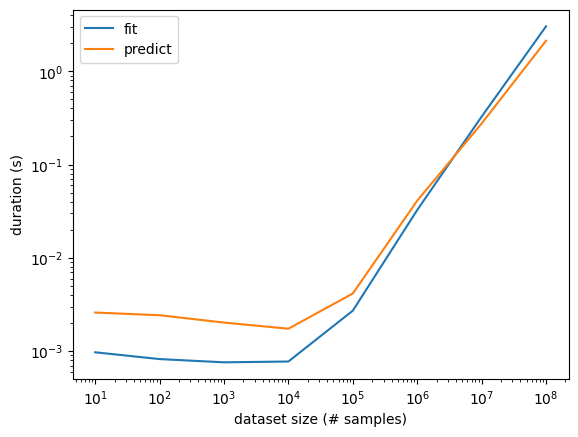

In [31]:
test_point = np.array([0.4, 2.5])

# With the logistic regresion we can extract the confidence score by using the
# predict_proba method.
confidence_scores = lr_model.predict_proba([test_point])

# The confidence score is a list of 3 confidence scores, one for each class
confidence_scores 

Having a model that can output these scores is great, because then different users can tune the thresholds to their needs.

**Other considerations**

When choosing a model, it is important to consider how it handles different types of data.
For instance, some models, like Random Forests, can handle missing data points, whereas others, like Linear Regression, require a complete dataset to function.

Additionally, many models are sensitive to the units or the scale of each feature.

#### 🖌️Changing units

So far we have been using **cm** as units for length.
What happens if we change cm to meters for a single feature?
How does this choice affect predictions?

Use the code below to modify the dataset and test whether the model gives the same answer for the same flower when the units change:

In [60]:
# modify the feature array so that the first feature is in meters
X_iris_2 = X_iris.copy()
X_iris_2["petal length (m)"] = X_iris["petal length (cm)"] / 100
X_iris_2 = X_iris_2.reindex(columns=["petal length (m)", "petal width (cm)"])

In [62]:
# we wish to classify a new flower. These are the measurements of the flower with
# two different units of measurements
test_point_5_cm = np.array([2.7, 0.7])  # (petal length cm, petal width cm)
test_point_5_m = np.array([0.027, 0.7])  # (petal length m, petal width cm)

✅ See solution below

In [ ]:
# Create a new kNN model
knn_model_meters = KNeighborsClassifier(n_neighbors=1)

# Train it with the scaled data
knn_model_meters.fit(X_iris_2, y_iris)

In [ ]:
# Predict at the test point with the original model
# NOTE: the predict method expects a list or array of test points, hence we
# need to wrap it in a list, i.e. [test_point]
cm_prediction = knn_model_1.predict([test_point_5_cm])

# Predict at the scaled test point (using m instead of cm) and the updated model
m_prediction = knn_model_meters.predict([test_point_5_m])

print(f"Prediction with cm model = {cm_prediction[0]}")
print(f"Prediction with m model = {m_prediction[0]}")

In [ ]:
# plot the decision regions
ax = plot_decision_boundary(knn_model_meters, X_iris_2, cmap=cmap_light)

# overlay data points from iris dataset
ax = sns.scatterplot(
    data=X_iris_2,
    x="petal length (m)",
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

The nearest-neighbor prediction changes when the model is trained using meters instead of centimeters for petal length.

After rescaling, the decision boundaries become almost horizontal.
This happens because the values along the petal length axis (in meters) are much smaller, so differences in that feature contribute very little to the distance calculation.
As a result, the model is driven mostly by petal width.

## 3. Model evaluation

You have seen multiple models for Iris flower classification.
Which model is the best fit?
How can we be confident about the predictions of a model, or evaluate its performance?

### Training and test split

We could use the training data to count the number of correct and erroneous predictions.
However this is a bad choice, as the Nearest Neighbor will always have 0 errors (can you see why?).
Using the training data will not provide a clear picture of prediction accuracy for new points.

**Solution**: Split the dataset into two parts: one for **training** another for evaluation or **testing**.

In [ ]:
# import the train_test_split function from scikit-learn module for model selection
from sklearn.model_selection import train_test_split

# split dataset and labels into test and train
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris,
    y_iris,
    test_size=0.3,  # test dataset is 30% of all data
)

# draw the dataset
sns.scatterplot(data=iris_data, x=feature_1, y=feature_2, hue=y_iris)

# with circles around the training set
sns.scatterplot(
    data=X_iris_train,
    x=feature_1,
    y=feature_2,
    marker="o",
    edgecolor="black",
    facecolor="none",
    label="train set",
)

#### 🖌️*Imbalanced datasets*

Datasets are rarely **balanced**, they often contain varying numbers of examples for each class (species).
Even with a balanced original dataset, a random selection can produce imbalanced subsets.
Training on imbalanced data can degrade performance, as models often become biased toward the majority class, "ignoring" the minority species.

1. Count how many examples per species you currently have in your training set.
2. Research **stratified sampling**.
3. Check the `scikit-learn` documentation for the `train_test_split` function.
   Identify which parameter controls stratification and use it to create a representative split for your model.

✅ See solution below

In [ ]:
# Count examples per species in the **train** dataset
y_iris_train.value_counts()

The number of examples per species in the training set is uneven due to random sampling (though the differences are small).

Stratified sampling addresses this by splitting the data within each class separately, ensuring that all species are represented in similar proportions in both the training and test sets.

In `scikit-learn`, this is controlled using the `stratify` argument in `train_test_split`.
By passing the class labels (here `y_iris`), each species is split proportionally, keeping 30% of each class for testing.

In [ ]:
# Create a balanced split
X_iris_train_bal, X_iris_test_bal, y_iris_train_bal, y_iris_test_bal = train_test_split(
    X_iris,
    y_iris,
    test_size=0.3,
    stratify=y_iris,
)

# Check that the resulting train dataset is now balanced
y_iris_train_bal.value_counts()

### Performance metrics

There are many measures of performance.
Accuracy, which is percentage of correct predictions, is commonly used for classification.
Other metrics will provide different information on the model's performace.
See the list of [classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) available in `scikit-learn`.

Let's start with accuracy which is the number of correct predictions

In [ ]:
from sklearn.metrics import accuracy_score

# create new Nearest Neighbor model
knn_model_3 = KNeighborsClassifier(n_neighbors=1)

# fit with train split
knn_model_3.fit(X_iris_train, y_iris_train)

# predict on the test data
iris_test_predictions = knn_model_3.predict(X_iris_test)

# compute accuracy
accuracy = accuracy_score(y_iris_test, iris_test_predictions)

accuracy

A more comprehensive report with per-species info:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_iris_test, iris_test_predictions))

Another helpful tool to understand and visualize model performance is the **Confusion Matrix**.
This table counts how many times each species was correctly identified versus how often it was misclassified as another species.


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_true=y_iris_test,
    y_pred=iris_test_predictions,
)

#### 🖌️*Evaluating performance of multiple models*

Compute the accuracy score, performance report and confusion matrices of all previous classification models on the iris dataset.
Which one is better?
Justify your answer.
Does the answer change if you use a different dataset split?

✅ See solution below

In [ ]:
# Fix a seed for reproducibility
seed = 18239243

# Create all models (using the seed when appropriate)
models = [
    KNeighborsClassifier(n_neighbors=1),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    LogisticRegression(random_state=seed),
]

# Create an empty dictionary to store the accuracies in
accuracies = {}

for model in models:
    # Fit each model
    model.fit(X_iris_train, y_iris_train)

    # Predict on the test set
    y_pred = model.predict(X_iris_test)

    # Compute the accuracy
    accuracy = accuracy_score(y_true=y_iris_test, y_pred=y_pred)

    # Save the accuracy
    accuracies[str(model)] = accuracy

    # Print the classification report
    print(f"==== {str(model):^43} ====")
    print(classification_report(y_true=y_iris_test, y_pred=y_pred))

# Print the model with highest accuracy
print(max(accuracies, key=lambda k: accuracies[k]))

On this dataset split, the random forest classifier achieves the highest accuracy (96%), while the other models reach about 93%.

In [ ]:
# Will create a function to do the same thing for the balanced dataset created earlier
models = [
    KNeighborsClassifier(n_neighbors=1),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    LogisticRegression(random_state=seed),
]

accuracies = {}

for model in models:
    # Fit each model
    model.fit(X_iris_train_bal, y_iris_train_bal)

    # Predict on the test set
    y_pred = model.predict(X_iris_test_bal)

    # Compute the accuracy
    accuracy = accuracy_score(y_true=y_iris_test_bal, y_pred=y_pred)

    # Save the accuracy
    accuracies[str(model)] = accuracy

    # Print the classification report
    print(f"==== {str(model):^43} ====")
    print(classification_report(y_true=y_iris_test_bal, y_pred=y_pred))

# Print the model with highest accuracy
print(max(accuracies, key=lambda k: accuracies[k]))

When using a different (balanced) split, the best-performing model changes: in this case, logistic regression achieves the highest accuracy.

*Note:* Results may vary due to randomness in the data split and model initialisation/training.
In practice, model performance often varies across different train–test splits.
To draw reliable conclusions, models should be evaluated across multiple splits (e.g., using cross-validation) and compared statistically.

## 4. Dimensionality Reduction

Often, the data we collect is high-dimensional, meaning each observation is represented by a large number of features.
This poses a challenge because it is nearly impossible to visualise anything beyond three dimensions.

Ideally, we can find a way to summarise all that data into fewer features that still capture the most relevant information.
This is the goal of dimensionality reduction: aggregating and simplifying many features into a smaller set without significant loss of information.

This is particularly useful for visualisation.
By reducing a complex dataset down to just two or three dimensions, we can plot the data and visually identify patterns, clusters, or outliers that were previously hidden.

### PCA

One of the simplest approach is to do a linear projection.

**PCA** is a linear projection that aligns with the directions of highest variance.

In [ ]:
# the full iris dataset has 4 features
iris_data.shape

In [ ]:
# import PCA from scikit-learn
from sklearn.decomposition import PCA

In [ ]:
# create a 2-dimensional PCA projection
pca_model = PCA(n_components=2)

In [ ]:
# project the 4-dimensional iris dataset into 2-d points
projected_iris = pca_model.fit_transform(iris_data)

In [ ]:
# plot projected points
# use species to color points
ax = sns.scatterplot(
    x=projected_iris[:, 0],
    y=projected_iris[:, 1],
    hue=y_iris,
    style=y_iris,
)

# add labels to axis
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")

### Visualization

As a final example let explore a dataset of digits.

Each data point is an grayscale image of a handwritten digit.

The images are 8x8 pixels, so in total each point has 64 features.

In this case a feature is the grayscale value of a single pixel.

In [ ]:
# import load_digits function from scikit-learn datasets module
from sklearn.datasets import load_digits

# load digits dataset
digits = load_digits()

# extract data and target values
X_digits = digits.data
y_digits = digits.target

# select a single data point
# reshape to original 8x8 array
digit = X_digits[0].reshape(8, 8)

# use matplotlib to show image
plt.imshow(digit, cmap="gray")

**How to visualise the whole dataset?**

Use dimensionality reduction

Lets try PCA

In [ ]:
# use PCA to project to 2 dimensions
pca_digits = PCA(n_components=2).fit_transform(X_digits)

# do a scatterplot, color points by digit
sns.scatterplot(
    x=pca_digits[:, 0],
    y=pca_digits[:, 1],
    hue=y_digits,
    palette="tab20",
)

Some digits seem to cluster.

Still, there is a lot of overlap.

Lets try a different projection method.

Now we will use a non-linear projection called **t-SNE**.

Checkout the [paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) where t-SNE was introduced, or this amazing [blog](https://distill.pub/2016/misread-tsne/) for further information.

In [ ]:
# import t-SNE mapping from scikit-learn
from sklearn.manifold import TSNE

In [ ]:
# use TSNE to project to 2 dimensions
tsne_digits = TSNE(
    n_components=2,
    init="pca",
    learning_rate="auto",
).fit_transform(X_digits)

# do a scatterplot, color points by digit
sns.scatterplot(
    x=tsne_digits[:, 0],
    y=tsne_digits[:, 1],
    hue=y_digits,
    palette="tab20",
)

#### 🖌️*Forest cover type dataset*

Checkout the [fores cover type dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype).

Load the forest cover type dataset with scikit-learn.
Use PCA and t-SNE projections on the data.
Do a scatterplot with the results and use the cover type class to colour points.
Are the points clearly separated?
Install the [umap-learn](https://umap-learn.readthedocs.io/en/latest/index.html) library and test the UMAP (Uniform Manifold Approximation and Projection) algorithm.

✅ Start of solution

In [ ]:
from sklearn.datasets import fetch_covtype

# Fetch the data
covtype = fetch_covtype(as_frame=True)

# Select a subset (1%) but groupby (stratify) by cov type
# otherwise it's very demanding computationally
subset = covtype.frame.groupby(covtype.target_names).sample(frac=0.01)

# Separate the features from the target
X_covtype = subset[covtype.feature_names]
y_covtype = subset[covtype.target_names[0]]

In [ ]:
covtype_pca = PCA(n_components=2).fit_transform(X_covtype)

sns.scatterplot(
    x=covtype_pca[:, 0],
    y=covtype_pca[:, 1],
    hue=y_covtype,
    palette="tab10",
)

In [ ]:
# Now try with TSNE
covtype_tsne = TSNE(n_components=2).fit_transform(X_covtype)

sns.scatterplot(
    x=covtype_tsne[:, 0],
    y=covtype_tsne[:, 1],
    hue=y_covtype,
    palette="tab10",
)

In [ ]:
# TSNE takes a while to run and demands a lot of resources
# let's try UMAP
from umap import UMAP
from sklearn.preprocessing import StandardScaler

covtype_umap = UMAP(n_components=2).fit_transform(X_covtype)

sns.scatterplot(
    x=covtype_umap[:, 0],
    y=covtype_umap[:, 1],
    hue=y_covtype,
    palette="tab10",
)

#### 🖌️*Scaling variables*

Most dimensionallity reduction methods are sensitive to scaling.
Projection results are often dominated by features with larger values.
Therefore it is common to standardise the variables before using dimensionallity reduction methods.
A standardised variable has mean 0 and standard deviation of 1.
Here is the formula to standardise a variable:

$$\hat{x} = \frac{x - mean(x)}{std(x)}$$

Scikit-learn provides standarisation utilities.

In [ ]:
# import the StandardScaler from scikit-learn preprocessing module
from sklearn.preprocessing import StandardScaler

# standardise the iris features
X_iris_std = StandardScaler().fit_transform(iris_data)

In [ ]:
# project the standardized features with PCA
pca_iris_std = PCA(
    n_components=2,
).fit_transform(X_iris_std)

# do a scatterplot of PCA projection, color points by digit
sns.scatterplot(
    x=pca_iris_std[:, 0],
    y=pca_iris_std[:, 1],
    hue=y_iris,
    palette="tab20",
)

Try the clustering techniques on the `covtype` dataset after standarisation

✅ See code below

In [ ]:
# Standardise the covtype dataset
X_covtype_std = StandardScaler().fit_transform(X_covtype)

# Models to try out
models = [
    PCA(n_components=2),
    TSNE(n_components=2),
    UMAP(n_components=2)
]

# Will create a composite figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate over each model and subplot
for model, ax in zip(models, axes):
    # Fit the dimensionality reduction model on the standardised data
    projection = model.fit_transform(X_covtype_std)

    # Plot using the cov type as color and using the subplot ax
    sns.scatterplot(
        x=projection[:, 0],
        y=projection[:, 1],
        hue=y_covtype,
        palette="tab20",
        ax=ax,
    )

    # Add a title to the subplot with the name of the type of model
    ax.set_title(type(model).__name__)


## 5. Clustering [20 min]

**What if we don't have any labels?**

Often our data contains some **structure**.

* Features from different classes might be separated (**separability**)

* Similar objects might have similar features (**smoothness**)

Often we wish to find groupings or patterns in our data.
This is called **clustering**.

Datapoints in the same **cluster** are deemed to be similar under some measure.

### K-Means Clustering

There are many algorithms for clustering.
Here you will use k-means clustering.

Scikit-learn has a [collection of clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html#clustering), including k-means.

If interested, checkout an [explanation](https://www.youtube.com/watch?v=4b5d3muPQmA) of the k-means clustering algorithm or an [interactive simulation](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/).

In [ ]:
# import make_blobs function in scikit-learn datasets module
from sklearn.datasets import make_blobs

# generate synthetic dataset made up of 5 blobs
X_blobs, y_blobs = make_blobs(n_features=2, n_samples=4000, centers=5)

# plot synthetic dataset
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1])

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")

In [ ]:
# import k-means clustering model from scikit-learn
from sklearn.cluster import KMeans

# create a new K-means clustering model.
# specify 5 wanted clusters
kmeans_model_1 = KMeans(n_clusters=5)

# fit to dataset
kmeans_model_1.fit(X_blobs)

# get predicted clusters for the dataset
y_blobs_pred = kmeans_model_1.predict(X_blobs)

# plot predictions
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_blobs_pred)

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")

Clustering performance will depend on clustering parameters, choice of algorithm and data structure

In [ ]:
# repeat with 3 clusters
kmeans_model_2 = KMeans(n_clusters=3)

# fit to dataset
kmeans_model_2.fit(X_blobs)

# get predicted clusters for the dataset
y_blobs_pred = kmeans_model_2.predict(X_blobs)

# plot predictions
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_blobs_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")

In [ ]:
from sklearn.datasets import make_circles

# repeat with other dataset
X_circles, y_circles = make_circles(factor=0.2, n_samples=4000, noise=0.1)

# create K means with 2 clusters
kmeans_model_3 = KMeans(n_clusters=2)

# fit to dataset
kmeans_model_3.fit(X_circles)

# get predicted clusters for the dataset
y_pred = kmeans_model_3.predict(X_circles)

# plot predictions
ax = sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], hue=y_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")

In [ ]:
# repeat with DBscan algorithm
from sklearn.cluster import DBSCAN

# create DBSCAN model
dbscan_model = DBSCAN(eps=0.15)

# fit to dataset
y_pred = dbscan_model.fit_predict(X_circles)

# plot predictions
ax = sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], hue=y_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")

#### 🖌️*k-means clustering of the iris dataset*

Use K-means clustering on the iris dataset.
Can you recover the species separation?
Research Affinity Propagation clustering and compare to K-Means clustering

✅ See solution below.

In [ ]:
kmeans_model_iris = KMeans(n_clusters=3)

y_pred = kmeans_model_iris.fit_predict(iris_data)

sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    style=y_pred,
    hue=y_iris,
    palette="tab10",
)

In [ ]:
from sklearn.cluster import AffinityPropagation

affinity_model_iris = AffinityPropagation()

y_pred = affinity_model_iris.fit_predict(iris_data)

sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    style=y_pred,
    hue=y_iris,
    palette="tab10",
)

✅ Using K-means with three clusters largely recovers the species structure of the iris dataset.
Setosa is cleanly separated, while some overlap remains between versicolor and virginica, leading to a few misgrouped samples.

Affinity Propagation does not require specifying the number of clusters in advance; instead, it determines the number from the data.
Applied to the iris dataset, it identifies six clusters.
Each species is mostly split into two subgroups, with limited but nonzero mixing between species.

## Summary

**Which algorithm to choose?**

Short answer: It depends!

> The “No Free Lunch” Theorem argues that, without having substantive information about the modeling problem, there is no single model that will always do better than any other model. Because of this, a strong case can be made to try a wide variety of techniques, then determine which model to focus on.
>
> — Pages 25-26, Applied Predictive Modeling, 2013.

No silver bullet, but often for classification it is sensible to first try a Support Vector Machine or Random Forest.

This will give you an idea of how separable your data is. The next step is to try different features, and perhaps even collect more training data.

**How much data do I need?**

Short answer: It depends!

It depends on how easy it is for your classifier to separate your data. 

Some problems are relatively easy and don’t require lots of data, others such as species identification in images can require 10,000s.